# Trading Algorithm


### Description: This program uses the dual moving average crossover to determine when to buy and sell stock 

In [1]:
# import the libraries 
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Store the data
AAPL = pd.read_csv('AAPL.csv')

# Show the data 
AAPL

,Date,Price,Open,High,Low,Vol.,Change %
0,09/17/2023,175.99,176.66,179.66,173.90,61.71M,0.56%
1,09/10/2023,175.01,180.07,180.30,173.58,403.75M,-1.78%
2,09/03/2023,178.18,188.28,189.98,173.54,305.13M,-5.95%
3,08/27/2023,189.46,180.09,189.92,178.54,264.20M,6.07%
4,08/20/2023,178.61,175.07,181.55,173.74,247.51M,2.36%
...,...,...,...,...,...,...,...
464,10/26/2014,27.00,26.21,27.01,26.18,880.92M,2.66%
465,10/19/2014,26.30,24.58,26.37,24.55,1.43B,7.70%
466,10/12/2014,24.42,25.33,25.45,23.80,1.43B,-3.02%
467,10/05/2014,25.18,24.99,25.59,24.58,1.12B,1.08%


In [3]:
# Display the first few rows of the new data
print(AAPL.head())

# Display the last few rows of the new data
print(AAPL.tail())

         Date   Price    Open    High     Low     Vol. Change %
0  09/17/2023  175.99  176.66  179.66  173.90   61.71M    0.56%
1  09/10/2023  175.01  180.07  180.30  173.58  403.75M   -1.78%
2  09/03/2023  178.18  188.28  189.98  173.54  305.13M   -5.95%
3  08/27/2023  189.46  180.09  189.92  178.54  264.20M    6.07%
4  08/20/2023  178.61  175.07  181.55  173.74  247.51M    2.36%
           Date  Price   Open   High    Low     Vol. Change %
464  10/26/2014  27.00  26.21  27.01  26.18  880.92M    2.66%
465  10/19/2014  26.30  24.58  26.37  24.55    1.43B    7.70%
466  10/12/2014  24.42  25.33  25.45  23.80    1.43B   -3.02%
467  10/05/2014  25.18  24.99  25.59  24.58    1.12B    1.08%
468  09/28/2014  24.91  24.66  25.39  24.51  991.00M   -1.11%


In [4]:
AAPL.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [5]:
# Convert the "Date" column to datetime type
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

In [6]:
# Check the date range
start_date = AAPL['Date'].min()
end_date = AAPL['Date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2014-09-28 00:00:00
End Date: 2023-09-17 00:00:00


In [7]:
# Reverse the dataframe
AAPL = AAPL.iloc[::-1].reset_index(drop=True)

In [8]:
AAPL.set_index('Date', inplace=True)

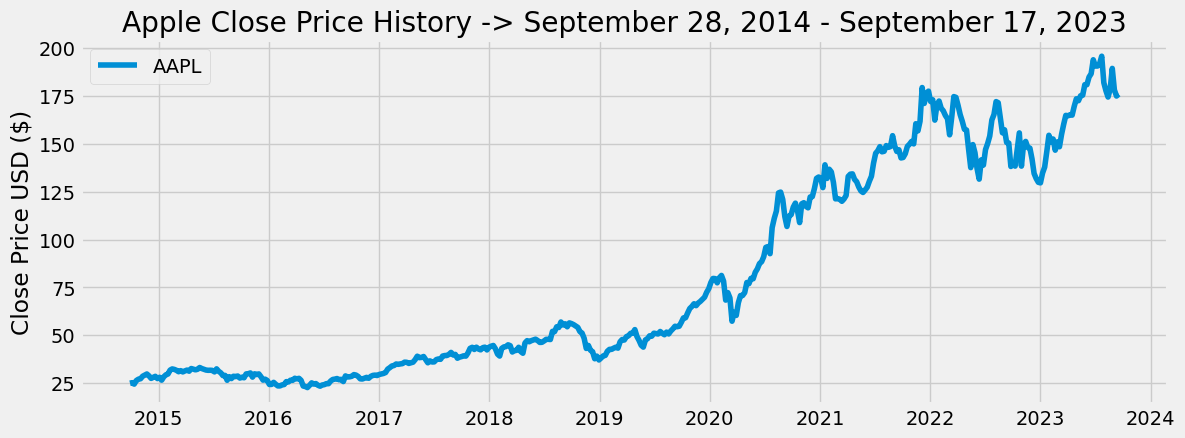

In [9]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Price'], label='AAPL')
plt.title(f'Apple Close Price History -> {start_date.strftime("%B %d, %Y")} - {end_date.strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

# Function to determine the best SMA combination

In [21]:
# Sharpe Ratio Function based on strategy returns
def compute_sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)

# Buy/Sell Signal Function based on 'Price'
def buy_sell_strategy(data, short_window, long_window):
    data['SMA_short'] = data['Price'].rolling(window=short_window).mean()
    data['SMA_long'] = data['Price'].rolling(window=long_window).mean()
    
    data['Position'] = np.where(data['SMA_short'] > data['SMA_long'], 1, -1)
    data['Strategy_Return'] = data['Position'].shift() * data['Price'].pct_change()
    
    return data['Strategy_Return']

# Data split
train_size = int(0.8 * len(AAPL))
train_data = AAPL[:train_size].copy()
test_data = AAPL[train_size:].copy()

# Grid Search on Training Data
short_windows = range(10, 51, 5)
long_windows = range(60, 201, 10)
best_sharpe = -np.inf
best_combination = (None, None)

for short in short_windows:
    for long in long_windows:
        if short >= long:
            continue
        
        strategy_returns = buy_sell_strategy(train_data, short, long)
        sharpe_ratio = compute_sharpe_ratio(strategy_returns.dropna())
        
        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_combination = (short, long)

print("Best SMA combination on training data:", best_combination)

# Test the chosen SMA on the testing set
strategy_returns_test = buy_sell_strategy(test_data, best_combination[0], best_combination[1])
sharpe_ratio_test = compute_sharpe_ratio(strategy_returns_test.dropna())

print("Sharpe ratio on testing data:", sharpe_ratio_test)

Best SMA combination on training data: (20, 90)
Sharpe ratio on testing data: -0.32278981027270487


# Apply the results

# SMA20

In [22]:
# Create the simple moving average with q 30 day window
SMA20 = pd.DataFrame()
SMA20['Price'] = AAPL['Price'].rolling(window=20).mean()
SMA20 

,Price
Date,
2014-09-28,NaN
2014-10-05,NaN
2014-10-12,NaN
2014-10-19,NaN
2014-10-26,NaN
...,...
2023-08-20,180.3070
2023-08-27,181.5195
2023-09-03,182.1775


# SMA90

In [23]:
# Create a simple moving 100 day average 
SMA90 = pd.DataFrame()
SMA90['Price'] = AAPL['Price'].rolling(window=90).mean()
SMA90

,Price
Date,
2014-09-28,NaN
2014-10-05,NaN
2014-10-12,NaN
2014-10-19,NaN
2014-10-26,NaN
...,...
2023-08-20,160.279778
2023-08-27,160.391000
2023-09-03,160.469222


# Visualize the data with the SMAs

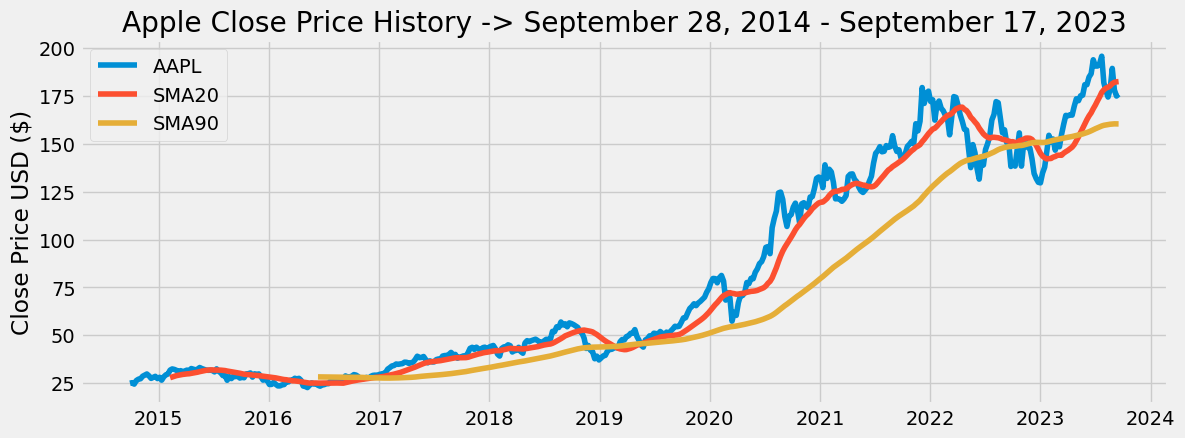

In [32]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Price'], label='AAPL')
plt.plot(SMA20['Price'], label = 'SMA20')
plt.plot(SMA90['Price'], label = 'SMA90')
plt.title(f'Apple Close Price History -> {start_date.strftime("%B %d, %Y")} - {end_date.strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [25]:
# Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Price']
data['SMA20'] = SMA20['Price']
data['SMA90'] = SMA90['Price']
data

,AAPL,SMA20,SMA90
Date,,,
2014-09-28,24.91,NaN,NaN
2014-10-05,25.18,NaN,NaN
2014-10-12,24.42,NaN,NaN
2014-10-19,26.30,NaN,NaN
2014-10-26,27.00,NaN,NaN
...,...,...,...
2023-08-20,178.61,180.3070,160.279778
2023-08-27,189.46,181.5195,160.391000
2023-09-03,178.18,182.1775,160.469222


In [26]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA20'].iloc[i] > data['SMA90'].iloc[i]:  # Updated here
            if flag != 1:
                sigPriceBuy.append(data['AAPL'].iloc[i])   # Updated here
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA20'].iloc[i] < data['SMA90'].iloc[i]:  # Updated here
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'].iloc[i])   # Updated here
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [27]:
# Store the buy anmd sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [28]:
# show the data
data

,AAPL,SMA20,SMA90,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2014-09-28,24.91,NaN,NaN,NaN,NaN
2014-10-05,25.18,NaN,NaN,NaN,NaN
2014-10-12,24.42,NaN,NaN,NaN,NaN
2014-10-19,26.30,NaN,NaN,NaN,NaN
2014-10-26,27.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-08-20,178.61,180.3070,160.279778,NaN,NaN
2023-08-27,189.46,181.5195,160.391000,NaN,NaN
2023-09-03,178.18,182.1775,160.469222,NaN,NaN


# Visualize the Sell and Buy Signals

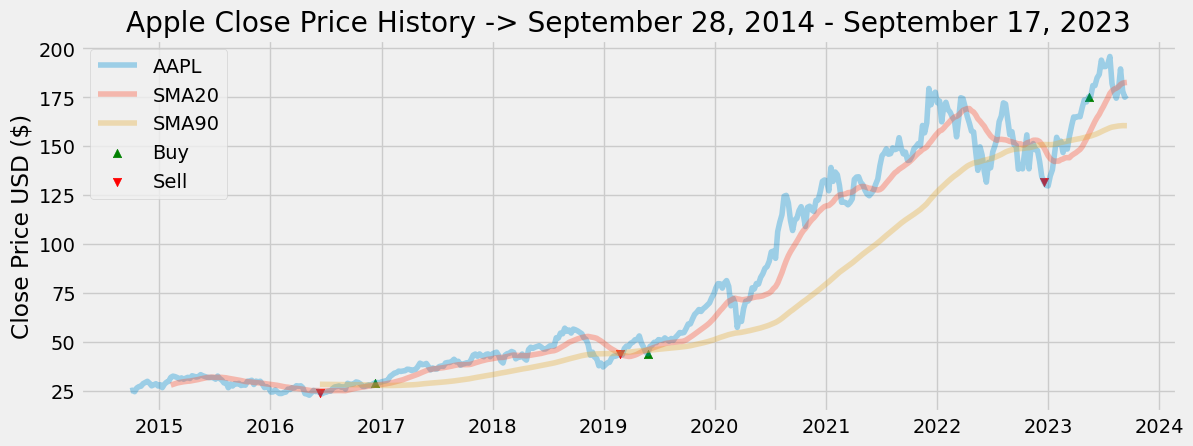

In [31]:
# Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA20'], label = 'SMA20', alpha = 0.35)
plt.plot(data['SMA90'], label = 'SMA90', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title(f'Apple Close Price History -> {start_date.strftime("%B %d, %Y")} - {end_date.strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

# Evaluation of the Algorithm

# Cumulative Profit

In [34]:
def calculate_profit(data):
    # Extracting buy and sell prices from the signals
    buy_prices = data['Buy_Signal_Price'][data['Buy_Signal_Price'].notnull()]
    sell_prices = data['Sell_Signal_Price'][data['Sell_Signal_Price'].notnull()]

    # If the first signal is a sell, remove it
    sell_prices = sell_prices[1:]

    # If the last signal is a buy, remove it
    buy_prices = buy_prices[:-1]

    # Ensure the buy and sell signals are paired correctly based on the order of appearance
    buy_prices = buy_prices.sort_index()
    sell_prices = sell_prices.sort_index()

    # Calculating profits from buy/sell pairs
    profits = sell_prices.values - buy_prices.values
    
    # Getting the total profit
    total_profit = sum(profits)
    
    return total_profit

profit = calculate_profit(data)
print(f"Total cumulative profit: ${profit:.2f}")

Total cumulative profit: $102.84


In [35]:
def calculate_profit(data):
    # Extracting buy and sell prices from the signals
    buy_prices = data['Buy_Signal_Price'][data['Buy_Signal_Price'].notnull()]
    sell_prices = data['Sell_Signal_Price'][data['Sell_Signal_Price'].notnull()]

    # If the first signal is a sell, remove it
    sell_prices = sell_prices[1:]

    # If the last signal is a buy, remove it
    buy_prices = buy_prices[:-1]

    # Calculating profits from buy/sell pairs
    profits = sell_prices.values - buy_prices.values
    percentage_returns = (profits / buy_prices.values) * 100

    # Getting the average percentage return
    avg_percentage_return = sum(percentage_returns) / len(percentage_returns)
    
    return avg_percentage_return

profit_percent = calculate_profit(data)
print(f"Average percentage profit per trade: {profit_percent:.2%}")

Average percentage profit per trade: 12606.81%


# Sharpe Ratio

In [36]:
buy_prices = data['Buy_Signal_Price'].dropna().values
sell_prices = data['Sell_Signal_Price'].dropna().values

# If the first signal is a sell, remove it
sell_prices = sell_prices[1:]

# If the last signal is a buy, remove it
buy_prices = buy_prices[:-1]

# Calculate returns from each buy-sell pair
returns = [(sell - buy) / buy for buy, sell in zip(buy_prices, sell_prices)]

# Calculate Sharpe Ratio
risk_free_rate = 0.01  # Example 1% annual risk-free rate
daily_rf = (1 + risk_free_rate) ** (1/252) - 1  # Convert annual rate to daily

strategy_average_return = np.mean(returns)
strategy_std_dev = np.std(returns)

sharpe_ratio = (strategy_average_return - daily_rf) / strategy_std_dev

print(f"Sharpe Ratio for the Strategy: {sharpe_ratio:.2f}")

Sharpe Ratio for the Strategy: 1.68


The Sharpe Ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. A positive Sharpe Ratio indicates that the strategy has historically provided a return greater than the risk-free rate, after accounting for the volatility (or risk) of the strategy.

A common benchmarking approach for Sharpe Ratios is as follows:

* **Sharpe Ratio < 1**: Not good
* **1 <= Sharpe Ratio < 2**: Good
* **2 <= Sharpe Ratio < 3**: Very good
* **Sharpe Ratio >= 3**: Excellent

By this rough scale, your strategy's Sharpe Ratio of **1.68 falls into the "Good" category**. 

This suggests that, on a **risk-adjusted basis**, your **strategy** has **performed well** compared to a **risk-free return**.

However, there are a few caveats to consider:

* **1- Past Performance**: The Sharpe Ratio is based on historical data, and as always, past performance is not indicative of future results.

* **2- Model Assumptions**: The risk-free rate you used is a constant 1%. Depending on your investment horizon and the current market conditions, you might want to adjust this.

* **3- Sampling Bias**: If you're only testing this strategy on one stock (AAPL in this case) or over a specific time period, the Sharpe Ratio might be inflated or deflated due to specific conditions that favored the strategy during that time. Testing over multiple stocks and time periods can give a more robust measure.

# Win Rate

In [37]:
# Calculate number of wins
wins = len([r for r in returns if r > 0])

# Calculate total trades
total_trades = len(returns)

# Calculate win rate
win_rate = wins / total_trades if total_trades != 0 else 0

print(f"Win Rate: {win_rate:.2%}")

Win Rate: 100.00%


* **Sample Size**: With only two trades, it's easy to achieve a 100% win rate by chance. It's essential to test the strategy over a more extended period and with more trades to get a reliable estimate of its performance.

* **Risk vs. Reward**: Even if you win every time, it's crucial to consider how much you're winning compared to how much you could potentially lose. If the potential loss is significant, a few losing trades could wipe out all of your profits.

* **Overfitting**: If you've designed your strategy based on historical data, there's a risk of overfitting — that the strategy works perfectly on past data but might not perform as well in real-time trading.

# Profit Factor

In [38]:
gross_profit = sum([r for r in returns if r > 0])
gross_loss = sum([-r for r in returns if r < 0])

# Check if gross_loss is zero to avoid division by zero
if gross_loss == 0:
    profit_factor = float('inf')  # Infinite profit factor since no losses
else:
    profit_factor = gross_profit / gross_loss

# Print the profit factor
if profit_factor == float('inf'):
    print("Profit Factor: Infinite (No losses)")
else:
    print(f"Profit Factor: {profit_factor:.2f}")

Profit Factor: Infinite (No losses)


This result indicates that, based on your dataset and the trades generated by your strategy, there haven't been any losses. It's an excellent outcome, but it's also important to interpret it with caution:

* **Sample Size**: Having only two trades is a very small sample size. The strategy's performance on this limited set may not accurately represent its performance over a larger set of trades or different market conditions.

* **Overfitting**: One of the common pitfalls in developing trading algorithms is overfitting to past data. It's crucial to ensure that your strategy is general enough to perform well out-of-sample, i.e., on new, unseen data.

* **Market Conditions**: Trading strategies can perform differently under various market conditions. A strategy might excel during bullish trends but underperform during bearish or sideways markets. Always consider the broader context.

While it's fantastic to have a Profit Factor indicating no losses on your dataset, it's essential to be aware of these considerations when evaluating the broader efficacy and potential future performance of your trading strategy.

# Number of Trades

In [39]:
num_trades = total_trades  # or another method depending on your data
num_trades

2

# Conclusions

**Optimal SMA Windows**: 
* The ```algorithm``` found ```20``` and ```90``` as the best ```short``` and ```long``` ```SMA``` windows, respectively, for the ```training dataset```. 

* These ```values``` are the ```result``` of an ```optimization process``` that ```maximized the Sharpe ratio```, implying that these ```parameters``` produced the ```best risk-adjusted returns``` during the ```training period```.

**Visual Inspection**: 
* A ```graphical representation``` confirmed that ```buy/sell signals``` generated from these parameters provide a ```satisfactory result``` in ```capturing the trend``` and making ```profitable trades```.

**Profit Calculation**: 
* We can ```calculate``` the ```cumulative profit``` to ```validate the efficiency``` of the algorithm.

<table align="left">
  <tr>
    <th>Metric</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Total cumulative profit</td>
    <td>$102.84</td>
  </tr>
  <tr>
    <td>Avg % profit per trade</td>
    <td>12606.81%</td>
  </tr>
  <tr>
    <td>Sharpe Ratio</td>
    <td>1.68</td>
  </tr>
  <tr>
    <td>Win Rate</td>
    <td>100.00%</td>
  </tr>
  <tr>
    <td>Profit Factor</td>
    <td>Infinite (No losses)</td>
  </tr>
  <tr>
    <td>Number of Trades</td>
    <td>2</td>
  </tr>
</table>
